<a href="https://colab.research.google.com/github/farid-hamid/FinalYearProjectFH/blob/main/Optimised_NLP_Model_Framework_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Model Framework** 🔡📊
---
*This notebook consists and demonstrates a working NLP model framework consisting of an unsupervised learning stage (extracting and labelling topics from a text corpus) and a supervised stage (multi topic text classification). The text corpus consists of posts and comments from popular Diabetes based subReddits where the discussion of Continuous Glucose Monitoring systems and devices are common.*

# **Initial Importing & pip installation of relevant libraries** 📦

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import string

In [4]:
import nltk

In [5]:
%pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.5 MB/s eta 0:00:00


In [6]:
%pip install HDBSCAN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for HDBSCAN: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039282 sha256=f8111ff37b96540654d12297a777a400dfb1a962bce92f1a5ed41e1d946e198a
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built HDBSCAN
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


# **Data Cleaning and Natural Language Processing** 🧼📖
*Preparing the text corpus for upcoming topic modelling by normalising the data, removing polluting elements of user-generated data and appropriating document length using spaCy.*

In [7]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/scraped_diabetes_discussion_data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subReddit            1000 non-null   object 
 1   Date of Post         1000 non-null   object 
 2   Title                995 non-null    object 
 3   Body Text            941 non-null    object 
 4   Top Comment          941 non-null    object 
 5   Top Comment Reply 1  551 non-null    object 
 6   Top Comment Reply 2  128 non-null    object 
 7   Top Comment Reply 3  38 non-null     object 
 8   Top Comment Reply 4  18 non-null     object 
 9   Top Comment Reply 5  0 non-null      float64
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


In [8]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subReddit            1000 non-null   object 
 1   Date of Post         1000 non-null   object 
 2   Title                995 non-null    object 
 3   Body Text            941 non-null    object 
 4   Top Comment          941 non-null    object 
 5   Top Comment Reply 1  551 non-null    object 
 6   Top Comment Reply 2  128 non-null    object 
 7   Top Comment Reply 3  38 non-null     object 
 8   Top Comment Reply 4  18 non-null     object 
 9   Top Comment Reply 5  0 non-null      float64
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


In [9]:
data = df

In [10]:
data.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5
0,r/diabetes,2023-07-13 07:27:00,Freestyle Libre 2 Update Breaking App,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,r/diabetes,2023-07-13 07:29:00,There has been an update rolled out for the Fr...,It may be worth holding off updating until the...,NaN,NaN,NaN,NaN,NaN,NaN
2,r/diabetes,2023-07-13 07:33:00,NaN,Deleting the app and re-downloading it from th...,It's a shame it deletes all my data but yeah i...,NaN,NaN,NaN,NaN,NaN
3,r/diabetes,2023-07-13 07:39:00,NaN,I know 😭 It also disconnected me from my diabe...,Has it? I rang Abbott and they said everything...,NaN,NaN,NaN,NaN,NaN
4,r/diabetes,2023-07-14 09:53:00,NaN,I had to input my clinic code again but there ...,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#n = len(data)

In [12]:
data.drop(['Date of Post'], axis=1)


,subReddit,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5
0,r/diabetes,Freestyle Libre 2 Update Breaking App,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,r/diabetes,There has been an update rolled out for the Fr...,It may be worth holding off updating until the...,NaN,NaN,NaN,NaN,NaN,NaN
2,r/diabetes,NaN,Deleting the app and re-downloading it from th...,It's a shame it deletes all my data but yeah i...,NaN,NaN,NaN,NaN,NaN
3,r/diabetes,NaN,I know 😭 It also disconnected me from my diabe...,Has it? I rang Abbott and they said everything...,NaN,NaN,NaN,NaN,NaN
4,r/diabetes,NaN,I had to input my clinic code again but there ...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,r/diabetes,Our son has recently moved to a Freestyle libr...,i used to wear them on the arm but kept knocki...,NaN,NaN,NaN,NaN,NaN,NaN
996,r/diabetes,Abbott will always replace. It is a pain but t...,We are still in the early days of this technol...,Skin tac is also good to keep them in place.,NaN,NaN,NaN,NaN,NaN
997,r/diabetes,I used to wear the original Libre sensors for ...,the main issue was getting them off again. But...,NaN,NaN,NaN,NaN,NaN,NaN
998,r/diabetes,Monitoring using Libre Link app,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#lowercase
data['Title'] = data['Title'].str.lower()
data['Body Text'] = data['Body Text'].str.lower()
data['Top Comment'] = data['Top Comment'].str.lower()
data['Top Comment Reply 1'] = data['Top Comment Reply 1'].str.lower()
data['Top Comment Reply 2'] = data['Top Comment Reply 2'].str.lower()
#data['Top Comment Reply 3'] = data['Top Comment Reply 3'].str.lower()
#data['Top Comment Reply 4'] = data['Top Comment Reply 4'].str.lower()

In [14]:
data.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5
0,r/diabetes,2023-07-13 07:27:00,freestyle libre 2 update breaking app,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,r/diabetes,2023-07-13 07:29:00,there has been an update rolled out for the fr...,it may be worth holding off updating until the...,NaN,NaN,NaN,NaN,NaN,NaN
2,r/diabetes,2023-07-13 07:33:00,NaN,deleting the app and re-downloading it from th...,it's a shame it deletes all my data but yeah i...,NaN,NaN,NaN,NaN,NaN
3,r/diabetes,2023-07-13 07:39:00,NaN,i know 😭 it also disconnected me from my diabe...,has it? i rang abbott and they said everything...,NaN,NaN,NaN,NaN,NaN
4,r/diabetes,2023-07-14 09:53:00,NaN,i had to input my clinic code again but there ...,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.fillna('', inplace=True)
data['Discussion'] = data.apply(lambda row: ' '.join(row[['Title', 'Body Text', 'Top Comment', 'Top Comment Reply 1', 'Top Comment Reply 2']].values), axis=1)

In [16]:
data.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion
0,r/diabetes,2023-07-13 07:27:00,freestyle libre 2 update breaking app,,,,,,,,freestyle libre 2 update breaking app
1,r/diabetes,2023-07-13 07:29:00,there has been an update rolled out for the fr...,it may be worth holding off updating until the...,,,,,,,there has been an update rolled out for the fr...
2,r/diabetes,2023-07-13 07:33:00,,deleting the app and re-downloading it from th...,it's a shame it deletes all my data but yeah i...,,,,,,deleting the app and re-downloading it from t...
3,r/diabetes,2023-07-13 07:39:00,,i know 😭 it also disconnected me from my diabe...,has it? i rang abbott and they said everything...,,,,,,i know 😭 it also disconnected me from my diab...
4,r/diabetes,2023-07-14 09:53:00,,i had to input my clinic code again but there ...,,,,,,,i had to input my clinic code again but there...


In [17]:
def remove_punctuation_and_emojis(text):
    if not isinstance(text, str):
        #if text is not a string, return it as it is
        return text

    punctuation = string.punctuation
    #punctuation translator
    translator = str.maketrans('', '', string.punctuation)
    #remove punctuation
    text = text.translate(translator)

    #regex pattern for emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  #emoticons
                           u"\U0001F300-\U0001F5FF"  #symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  #transport & map symbols
                           u"\U0001F700-\U0001F77F"  #alchemical symbols
                           u"\U0001F780-\U0001F7FF"  #Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  #Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  #Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  #Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  #Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  #Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #removals

    return text

In [18]:
data['Discussion'] = data['Discussion'].apply(lambda x: remove_punctuation_and_emojis(x))

In [19]:
#removal of other incoherent chars
def remove_chars(text):

    if isinstance(text, str):
        #replace numbers with empty string, remove nd,rd,st, http and www, any strings longer than 26 chars
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\bnd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\brd\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bst\b|\b[a-zA-Z]{1,2}\b', '', text)
        text = re.sub(r'\bblah\b|\b[a-zA-Z]{1,2,3,4}\b', '', text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'\b\w{26,}\b', '', text)
    return text


In [20]:
data['Discussion'] = data['Discussion'].apply(lambda x: remove_chars(x) if isinstance(x, str) else x)

In [21]:
data = data[data['Discussion'].apply(lambda x: len(x) >= 10)] #remove records which are too short and will pollute the model

In [22]:
def clean_text_digits(text):
    #Tokenize the text into words
    tokens = word_tokenize(text)


    translator = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(translator) for w in tokens]

    #Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()and len(word) > 2]

    #join the list of words into a single string
    return ' '.join(words)

In [23]:
data['Discussion'] = data['Discussion'].apply(clean_text_digits)
df.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion
0,r/diabetes,2023-07-13 07:27:00,freestyle libre 2 update breaking app,,,,,,,,freestyle libre update breaking app
1,r/diabetes,2023-07-13 07:29:00,there has been an update rolled out for the fr...,it may be worth holding off updating until the...,,,,,,,there has been update rolled out for the free...
2,r/diabetes,2023-07-13 07:33:00,,deleting the app and re-downloading it from th...,it's a shame it deletes all my data but yeah i...,,,,,,deleting the app and redownloading from the ...
3,r/diabetes,2023-07-13 07:39:00,,i know 😭 it also disconnected me from my diabe...,has it? i rang abbott and they said everything...,,,,,,know also disconnected from diabetic cli...
4,r/diabetes,2023-07-14 09:53:00,,i had to input my clinic code again but there ...,,,,,,,had input clinic code again but there seem...


In [24]:
#lemmatization
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


In [25]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
#part of speech tagging function
# def get_wordnet_pos(word):
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dictionary = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}

#     return tag_dictionary.get(tag, wordnet.NOUN)

In [27]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    #tokenize text to words
    words = word_tokenize(text)
    #lemmatize each word with pos tags
    return ' '.join([lemmatizer.lemmatize(w) for w in words])

In [28]:
data['Discussion'] = data['Discussion'].apply(lambda x: lemmatize_text(x) if isinstance(x, str) else x)

In [29]:
data.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion
0,r/diabetes,2023-07-13 07:27:00,freestyle libre 2 update breaking app,,,,,,,,freestyle libre update breaking app
1,r/diabetes,2023-07-13 07:29:00,there has been an update rolled out for the fr...,it may be worth holding off updating until the...,,,,,,,there ha been update rolled out for the freest...
2,r/diabetes,2023-07-13 07:33:00,,deleting the app and re-downloading it from th...,it's a shame it deletes all my data but yeah i...,,,,,,deleting the app and redownloading from the pu...
3,r/diabetes,2023-07-13 07:39:00,,i know 😭 it also disconnected me from my diabe...,has it? i rang abbott and they said everything...,,,,,,know also disconnected from diabetic clinic li...
4,r/diabetes,2023-07-14 09:53:00,,i had to input my clinic code again but there ...,,,,,,,had input clinic code again but there seems ga...


In [30]:
%pip install spacy

In [31]:
import spacy

#spaCy English model loading
nlp = spacy.load("en_core_web_sm")

In [32]:
def document_length_splitter(texts, character_threshold=40):

  #parse text using spaCy
  if len(texts) > character_threshold:
        # Parse the text using spaCy to extract sentences
        doc = nlp(texts)
        #Return a list of sentences
        return [sentence.text for sentence in doc.sents]
  else:
        #If the text is not too long, return it as a single-element list
        return [texts]


In [33]:
df2 = data.copy()

In [34]:
df2['Discussion'] = df2['Discussion'].apply(document_length_splitter)

In [35]:
df3 = df2.explode('Discussion')

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1432 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subReddit            1432 non-null   object
 1   Date of Post         1432 non-null   object
 2   Title                1432 non-null   object
 3   Body Text            1432 non-null   object
 4   Top Comment          1432 non-null   object
 5   Top Comment Reply 1  1432 non-null   object
 6   Top Comment Reply 2  1432 non-null   object
 7   Top Comment Reply 3  1432 non-null   object
 8   Top Comment Reply 4  1432 non-null   object
 9   Top Comment Reply 5  1432 non-null   object
 10  Discussion           1432 non-null   object
dtypes: object(11)
memory usage: 134.2+ KB


# **UMAP for Dimensionality Reduction & HDBSCAN for Clustering of topics**🪣
*Sub-model configuration to be fed into BERTopic model.*

In [37]:
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.02, random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=30, min_samples=15,
                        prediction_data=True, gen_min_span_tree=True)

In [38]:
%pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [39]:
#nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

In [40]:
from tqdm.auto import tqdm

In [41]:
n = len(df3)

In [42]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer


# **Stopwords Removal and Initiation of Vectorizer sub model**📑
A list of words which are extremely common in the use case and pollutants to the unsupervised learning algorithm pipeline being implemented. These are injected into the vectorizer sub model.



In [43]:
# from nltk.corpus import stopwords
# stopwords = list(stopwords.words('english')) + ['prescription','doesn','sensor','sensors','yes','lol','ha','wa','lmao','wtf','abbott','abott','pay','month','medicare', 'cgms', 'fda', 'patients', 'voucher', 'doctor', 'dex', 'authorization', 'cost', 'service','medical','covered','freestyle','company','tempo','glucose','cover','mgdl','reading','lot','wanting','want','hours','months','readings','question','since','day','night','first','last','started','ago','dont','using','use','pump','loss','around','new','phone','put','days','app', 'mmol','mmoll', 'drug','heck','the','http', 'https', 'amp', 'com', 'one', 'www', 'anyone', 'can', 'CVS', 'insurance', 'get', 'like', 'back', 'ive', 'would', 'omnipod', 'pharmacy', 'medtronic', 'to', 'turn','up','out','price', 'cgm','sugar','finger','prick','time','really','else','anybody','wait','blood','also','insulin','know','still','feel','got','thank','thanks','think','numbers','stick','going','check','about','even','too','always','much','be','how','yeah','pocket','yeah yeah','for','months']
# vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words=stopwords)

In [44]:
from nltk.corpus import stopwords
stopwords = list(stopwords.words('english')) + ['thank','yeah','sensor','insurance','prescription','help','yes','no','yet',
                                                'still','wa','ha','great','good','job','good job','one day', 'authorization', 'cost',
                                                'service','medical','covered','freestyle','company','tempo','glucose','cover',
                                                'mgdl','reading','lot','wanting','want','hours','months','readings','question',
                                                'since','day','night','first','last','started','ago','dont','using','use','pump',
                                                'loss','around','new','phone','put','days','app', 'mmol','mmoll', 'drug','heck',
                                                'the','http', 'https', 'amp', 'com', 'one', 'www', 'anyone', 'can', 'CVS', 'insurance',
                                                'get', 'like', 'back', 'ive', 'would', 'omnipod', 'pharmacy', 'medtronic', 'to',
                                                'turn','up','out','price', 'cgm','sugar','finger','prick','time','really','else',
                                                'anybody','wait','blood','also','insulin','know','still','feel','got','thank',
                                                'thanks','think','numbers','stick','going','check','about','even','too','always',
                                                'much','be','how','yeah','pocket','yeah yeah','for','months','invite','follower',
                                                'anonymous','anonymously']
vectorizer_model = CountVectorizer(ngram_range=(1, 3), stop_words=stopwords)

# **Embedding Text with Sentence Transformers**🤖
*Leveraging sentence transformers, documents in the text corpus are embedded in small batches for quality. These embeddings are saved in the* embeds *variable for later on, when the topic labels are extracted and they can be combined with the embedded dataset.*

In [45]:
n = len(df3)
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
embeds = np.zeros((n, embedding_model.get_sentence_embedding_dimension()))
texts = df3['Discussion'].tolist()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [46]:
#texts

In [47]:
batch_size=15


In [48]:
 for i in tqdm(range(0,n,batch_size)):
     i_end = min(i+batch_size,n)
     batch = df3['Discussion'].iloc[i:i_end].tolist()
     batch_embed = embedding_model.encode(batch)
     embeds[i:i_end,:] = batch_embed

  0%|          | 0/96 [00:00<?, ?it/s]

# **Representation sub-models**🌍
*Using keyBERT and Maximal Marginal Relevance to generate coherent topic labels which describe the pain point narrative in a piece of dialogue.*

In [49]:
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, TextGeneration
from transformers import pipeline

In [50]:
keybert = KeyBERTInspired()
mmr = MaximalMarginalRelevance(diversity=0.3)

representation_model = {
    "KeyBERT": keybert,
    "MMR": mmr,

}

# **BERTopic Model**💻
---
*The BERTopic model, consisting of a pipeline of unsupervised machine learning algorithms through its UMAP (dimensionality reduction), HDBSCAN (clustering with noise), text embedding, vectorisation and represenation sub-models, is initiated and trained below.*


In [51]:
BERTopic_model = BERTopic(
    #sub-models:
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    #hyper-parameters:
    min_topic_size = 35,#careful with tuning this parameter
    top_n_words=10,
    #nr_topics= 8,
    language='english',
    calculate_probabilities=True,
    verbose=True

)
#Train model:
topics, probs = BERTopic_model.fit_transform(texts, embeddings=embeds)

2024-04-05 15:13:29,250 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-05 15:13:41,852 - BERTopic - Dimensionality - Completed ✓
2024-04-05 15:13:41,855 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-05 15:13:41,979 - BERTopic - Cluster - Completed ✓
2024-04-05 15:13:41,990 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-05 15:13:55,857 - BERTopic - Representation - Completed ✓


In [52]:
for i in range(10):
    print(f"{topics[i]}: {df3['Discussion'][i]}")

9: freestyle libre update breaking app
3: there ha been update rolled out for the freestyle libre app that mean that you longer need scan for reading however after installing breaking the app for many and the download for the app ha been removed from the io app store for the least may worth holding off updating until they fix
2: 2    deleting the app and redownloading from the pu...
2                                                  but
2                                          yeah worked
Name: Discussion, dtype: object
-1: 3    know also disconnected from diabetic clinic li...
3    and they said everything libreview should stil...
Name: Discussion, dtype: object
-1: had input clinic code again but there seems gap the data they able view all goo
3: where about are you located the app the store ha been removed and only the freestyle libre app available this work the the main page app store click your picture the top right click purchased and find there
9: the too but this trick worked

In [53]:
BERTopic_model.visualize_barchart()

In [54]:
BERTopic_model.visualize_hierarchy()

In [55]:
#run this cell if rows are removed in NLP text cleaning, the index needs to be reset for visualize_documents() function to work
df3.reset_index(drop=True, inplace=True)

In [56]:
BERTopic_model.visualize_documents(df3['Discussion'], embeddings=embeds)

<Axes: ylabel='$\\lambda$ value'>

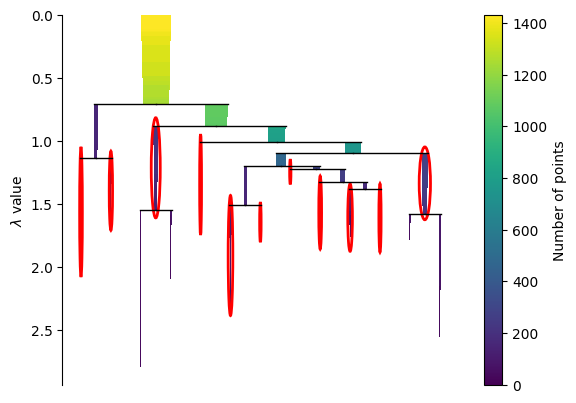

In [57]:
hdbscan_model.condensed_tree_.plot(select_clusters=True)

In [58]:
import plotly.express as px

In [59]:
assert len(topics) == len(df3)

In [60]:
df3['Topic'] = topics

In [61]:
df3.head()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion,Topic
0,r/diabetes,2023-07-13 07:27:00,freestyle libre 2 update breaking app,,,,,,,,freestyle libre update breaking app,9
1,r/diabetes,2023-07-13 07:29:00,there has been an update rolled out for the fr...,it may be worth holding off updating until the...,,,,,,,there ha been update rolled out for the freest...,3
2,r/diabetes,2023-07-13 07:33:00,,deleting the app and re-downloading it from th...,it's a shame it deletes all my data but yeah i...,,,,,,deleting the app and redownloading from the pu...,2
3,r/diabetes,2023-07-13 07:33:00,,deleting the app and re-downloading it from th...,it's a shame it deletes all my data but yeah i...,,,,,,but,-1
4,r/diabetes,2023-07-13 07:33:00,,deleting the app and re-downloading it from th...,it's a shame it deletes all my data but yeah i...,,,,,,yeah worked,-1


***As seen below, we have imbalanced topic classes, which is expected from such a diverse text corpus scraped from social media. This will be accounted for in the supervised learning stage of classification.***

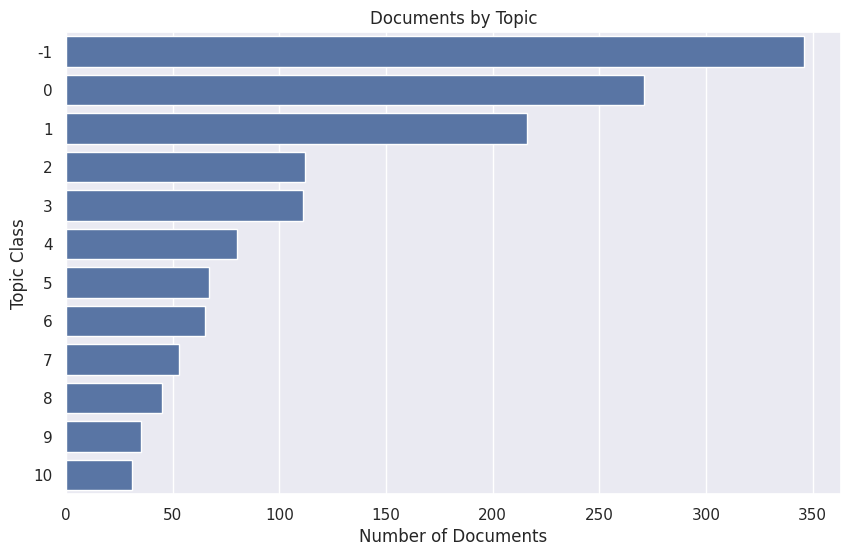

In [62]:
topic_counts = df3['Topic'].value_counts()
#data.drop(['Contains_Keywords'], axis=1)

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='Topic', data=df3, order = topic_counts.index)


plt.title('Documents by Topic')
plt.xlabel('Number of Documents')
plt.ylabel('Topic Class')


plt.show()

In [63]:
topic_distr, _ = BERTopic_model.approximate_distribution(texts)

100%|██████████| 2/2 [00:01<00:00,  1.61it/s]


In [64]:
BERTopic_model.visualize_distribution(topic_distr[1])

In [65]:
probs

array([[7.39257535e-309, 7.91451599e-309, 4.94302090e-308, ...,
        6.08393987e-309, 1.00000000e+000, 2.67948045e-308],
       [1.12853673e-308, 9.85555034e-309, 2.01417117e-308, ...,
        8.47345774e-309, 2.65810051e-308, 2.34561023e-308],
       [6.09345626e-309, 8.02809176e-309, 1.00000000e+000, ...,
        5.15571878e-309, 2.68399383e-308, 2.42456567e-308],
       ...,
       [3.40511779e-001, 5.39928030e-002, 4.71284188e-002, ...,
        1.00285293e-001, 4.37891617e-002, 4.49859636e-002],
       [5.15458520e-002, 4.90270170e-002, 7.89915172e-002, ...,
        3.75407368e-002, 7.76781689e-002, 1.02622288e-001],
       [6.08988327e-002, 1.45307295e-002, 1.27524304e-002, ...,
        2.35760612e-002, 1.32319855e-002, 1.52620024e-002]])

In [66]:
topic_distr, topic_token_distr = BERTopic_model.approximate_distribution(texts, calculate_tokens=True)
topic_dist_df = BERTopic_model.visualize_approximate_distribution(texts[1], topic_token_distr[1])


100%|██████████| 2/2 [00:01<00:00,  1.06it/s]


In [67]:
topic_dist_df

,there,ha,been,update,rolled,out,for,the,freestyle,libre,app,that,mean,that,you,longer,need,scan,for,reading,however,after,installing,breaking,the,app,for,many,and,the,download,for,the,app,ha,been,removed,from,the,io,app,store,for,the,least,may,worth,holding,off,updating,until,they,fix
0_libre_hour_low_number,0.000,0.000,0.000,0.000,0.000,0.000,0.263,0.525,0.788,0.788,0.525,0.263,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1_dexcom_libre_low_used,0.000,0.000,0.000,0.000,0.000,0.000,0.162,0.324,0.486,0.486,0.324,0.162,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2_signal_scan_issue_bluetooth,0.135,0.135,0.135,0.135,0.000,0.000,0.152,0.305,0.457,0.457,0.305,0.152,0.000,0.000,0.000,0.000,0.113,0.113,0.113,0.113,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.108,0.108,0.108,0.108,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3_libre_data_reader_update,0.149,0.149,0.149,0.149,0.000,0.000,0.310,0.620,0.931,0.931,0.620,0.310,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7_libre_pen_month_pay,0.000,0.000,0.000,0.000,0.000,0.000,0.259,0.519,0.778,0.778,0.519,0.259,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8_low_alarm_libre_compression,0.000,0.000,0.000,0.000,0.000,0.000,0.109,0.219,0.328,0.328,0.219,0.109,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9_libre_samsung_compatibility_pixel,0.116,0.116,0.116,0.116,0.000,0.000,0.341,0.681,1.022,1.022,0.681,0.341,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10_watch_apple_apple watch_garmin,0.000,0.000,0.000,0.000,0.000,0.000,0.108,0.216,0.324,0.324,0.216,0.108,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [68]:
BERTopic_model.visualize_term_rank(log_scale=True)

# **BERTopic Model Output Evaluation**🧪
---



# **Coherence**
*By qualitatively comparing the representations generated by the topic model, it is evident that they are coherent and diverse, where each topic is represented by uniques phrases and terms related to specific niches in CGMs usage.*

In [69]:
coherence = BERTopic_model.get_topic_info(); coherence.head(10)

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,346,-1_alarm_libre_low_work,"[alarm, libre, low, work, need, signal, could,...","[signal alarm, alarm, alert, signal, android, ...","[alarm, libre, low, work, need, signal, could,...",[yet this something can potentially fix androi...
1,0,271,0_libre_hour_low_number,"[libre, hour, low, number, accurate, issue, re...","[diabetes, alarm, meter, dexcom, libre, read, ...","[libre, hour, low, number, accurate, issue, re...",[libre question fairly new user libre keep rea...
2,1,216,1_dexcom_libre_low_used,"[dexcom, libre, low, used, high, minute, issue...","[dexcom libre, libre dexcom, dexcom, used dexc...","[dexcom, libre, low, used, high, minute, issue...",[dexcom libre howdy have switch from the libre...
3,2,112,2_signal_scan_issue_bluetooth,"[signal, scan, issue, bluetooth, libre, update...","[lost signal, librelink, reinstall, iphone pro...","[signal, scan, issue, bluetooth, libre, update...",[librelink iphone io freestyle libre problem h...
4,3,111,3_libre_data_reader_update,"[libre, data, reader, update, minute, abbott, ...","[libre reader, libreview, apps, libre libre, l...","[libre, data, reader, update, minute, abbott, ...",[what are some way get the data off the reader...
5,4,80,4_arm_low_side_compression,"[arm, low, side, compression, compression low,...","[low alarm, wake, alarm, sleep, side sleeper, ...","[arm, low, side, compression, compression low,...",[sleeping through low use fsl pretty consisten...
6,5,67,5_dexcom_transmitter_system_school,"[dexcom, transmitter, system, school, year, mo...","[dexcom, scanner, pod, keep, alarm, diagnosed,...","[dexcom, transmitter, system, school, year, mo...",[how many people reuse dexcom sensor using cgm...
7,6,65,6_adhesive_skin_dexcom_arm,"[adhesive, skin, dexcom, arm, needle, hit, ble...","[skin grip, skin tac, adhesive, dexcom, sweat,...","[adhesive, skin, dexcom, arm, needle, hit, ble...",[freestyle and the gym everyone looking advice...
8,7,53,7_libre_pen_month_pay,"[libre, pen, month, pay, diabetes, week, need,...","[diabetes, diabetic, libre instead, dexcom, li...","[libre, pen, month, pay, diabetes, week, need,...",[libre way too inaccurate these two day are th...
9,8,45,8_low_alarm_libre_compression,"[low, alarm, libre, compression, compression l...","[alarm low, low alarm, alarm low alarm, diabet...","[low, alarm, libre, compression, compression l...",[low with hot bath wondering low hot bath legi...


In [70]:
coherence_df = coherence

In [71]:
coherence_df

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,346,-1_alarm_libre_low_work,"[alarm, libre, low, work, need, signal, could,...","[signal alarm, alarm, alert, signal, android, ...","[alarm, libre, low, work, need, signal, could,...",[yet this something can potentially fix androi...
1,0,271,0_libre_hour_low_number,"[libre, hour, low, number, accurate, issue, re...","[diabetes, alarm, meter, dexcom, libre, read, ...","[libre, hour, low, number, accurate, issue, re...",[libre question fairly new user libre keep rea...
2,1,216,1_dexcom_libre_low_used,"[dexcom, libre, low, used, high, minute, issue...","[dexcom libre, libre dexcom, dexcom, used dexc...","[dexcom, libre, low, used, high, minute, issue...",[dexcom libre howdy have switch from the libre...
3,2,112,2_signal_scan_issue_bluetooth,"[signal, scan, issue, bluetooth, libre, update...","[lost signal, librelink, reinstall, iphone pro...","[signal, scan, issue, bluetooth, libre, update...",[librelink iphone io freestyle libre problem h...
4,3,111,3_libre_data_reader_update,"[libre, data, reader, update, minute, abbott, ...","[libre reader, libreview, apps, libre libre, l...","[libre, data, reader, update, minute, abbott, ...",[what are some way get the data off the reader...
5,4,80,4_arm_low_side_compression,"[arm, low, side, compression, compression low,...","[low alarm, wake, alarm, sleep, side sleeper, ...","[arm, low, side, compression, compression low,...",[sleeping through low use fsl pretty consisten...
6,5,67,5_dexcom_transmitter_system_school,"[dexcom, transmitter, system, school, year, mo...","[dexcom, scanner, pod, keep, alarm, diagnosed,...","[dexcom, transmitter, system, school, year, mo...",[how many people reuse dexcom sensor using cgm...
7,6,65,6_adhesive_skin_dexcom_arm,"[adhesive, skin, dexcom, arm, needle, hit, ble...","[skin grip, skin tac, adhesive, dexcom, sweat,...","[adhesive, skin, dexcom, arm, needle, hit, ble...",[freestyle and the gym everyone looking advice...
8,7,53,7_libre_pen_month_pay,"[libre, pen, month, pay, diabetes, week, need,...","[diabetes, diabetic, libre instead, dexcom, li...","[libre, pen, month, pay, diabetes, week, need,...",[libre way too inaccurate these two day are th...
9,8,45,8_low_alarm_libre_compression,"[low, alarm, libre, compression, compression l...","[alarm low, low alarm, alarm low alarm, diabet...","[low, alarm, libre, compression, compression l...",[low with hot bath wondering low hot bath legi...


In [72]:
df3.to_excel('/content/drive/MyDrive/Colab Notebooks/BERTopic Model Outputs.xlsx')

In [73]:
coherence_df.to_excel('/content/drive/MyDrive/Colab Notebooks/BERTopic Coherence.xlsx')

# **Supervised learning stage** ⚙🔨
---
*Feed the embedded labelled text corpus to multi-topic text classifiers to compare performance*

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [75]:
 classifier_dataset = list(zip(embeds,topics))

In [76]:
df3.head()
df3.tail()

,subReddit,Date of Post,Title,Body Text,Top Comment,Top Comment Reply 1,Top Comment Reply 2,Top Comment Reply 3,Top Comment Reply 4,Top Comment Reply 5,Discussion,Topic
1427,r/diabetes,2021-03-23 04:18:00,our son has recently moved to a freestyle libr...,i used to wear them on the arm but kept knocki...,,,,,,,our son ha recently moved freestyle libre and ...,4
1428,r/diabetes,2021-03-23 08:57:00,abbott will always replace. it is a pain but t...,we are still in the early days of this technol...,skin tac is also good to keep them in place.,,,,,,abbott will always replace pain but the sensor...,-1
1429,r/diabetes,2021-03-24 02:24:00,i used to wear the original libre sensors for ...,the main issue was getting them off again. but...,,,,,,,used wear the original libre sensor for about ...,0
1430,r/diabetes,2022-09-14 12:45:00,monitoring using libre link app,,,,,,,,monitoring using libre link app,3
1431,r/Freestylelibre,2023-05-26 11:46:00,overnight low blood glucose,using the libre 2 monitor for the past two day...,have you checked with a fingerprick?,,,,,,overnight low blood glucose using the libre mo...,7


In [77]:
 X_train, X_test, y_train, y_test = train_test_split(
     [embed[0] for embed in classifier_dataset],  #embedded document features
     [embed[1] for embed in classifier_dataset],  #topic labels
     test_size=0.1, random_state=42
 )

In [78]:
svm_model = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight = 'balanced', probability=True)
svm_model.fit(X_train,y_train)

predictions_svm = svm_model.predict(X_test)
svm_f1 = f1_score(y_test, predictions_svm, average='macro')
svm_recall = recall_score(y_test, predictions_svm, average='macro')
print("Nonlinear SVM Accuracy Score = ",accuracy_score(predictions_svm, y_test)*100)
print(f"Nonlinear SVM F1 Score = {svm_f1 * 100}")
print(f"Nonlinear SVM Recall = {svm_recall * 100}")
print(classification_report(y_test, predictions_svm))

Nonlinear SVM Accuracy Score =  63.888888888888886
Nonlinear SVM F1 Score = 65.76768239811717
Nonlinear SVM Recall = 70.2171664652483
              precision    recall  f1-score   support

          -1       0.64      0.41      0.50        34
           0       0.70      0.64      0.67        25
           1       0.74      0.74      0.74        23
           2       0.50      0.80      0.62        10
           3       0.53      0.69      0.60        13
           4       0.57      0.80      0.67         5
           5       0.67      0.57      0.62         7
           6       0.80      1.00      0.89         8
           7       0.75      0.60      0.67         5
           8       0.50      0.57      0.53         7
           9       0.60      0.60      0.60         5
          10       0.67      1.00      0.80         2

    accuracy                           0.64       144
   macro avg       0.64      0.70      0.66       144
weighted avg       0.65      0.64      0.63       144


In [79]:
log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_model.fit(X_train, y_train)
predictions_log_reg = log_reg_model.predict(X_test)
log_reg_f1 = f1_score(y_test, predictions_log_reg, average='macro')
log_reg_recall = recall_score(y_test, predictions_log_reg, average='macro')

print(classification_report(y_test, predictions_log_reg))

              precision    recall  f1-score   support

          -1       0.53      0.29      0.38        34
           0       0.70      0.64      0.67        25
           1       0.70      0.61      0.65        23
           2       0.44      0.70      0.54        10
           3       0.62      0.62      0.62        13
           4       0.57      0.80      0.67         5
           5       0.75      0.43      0.55         7
           6       0.64      0.88      0.74         8
           7       0.43      0.60      0.50         5
           8       0.45      0.71      0.56         7
           9       0.50      1.00      0.67         5
          10       0.67      1.00      0.80         2

    accuracy                           0.58       144
   macro avg       0.58      0.69      0.61       144
weighted avg       0.60      0.58      0.57       144



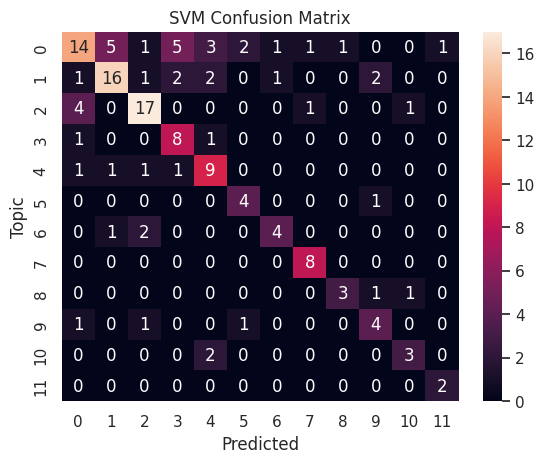

In [80]:
cm_svm = confusion_matrix(y_test, predictions_svm)
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Topic')
plt.title('SVM Confusion Matrix')
plt.show()

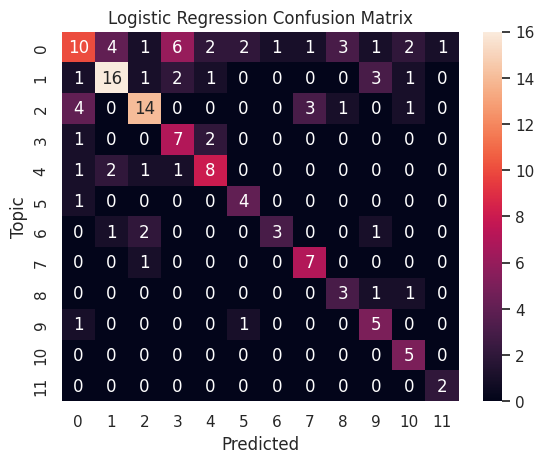

In [81]:
cm_logreg = confusion_matrix(y_test, predictions_log_reg)
sns.heatmap(cm_logreg, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Topic')
plt.show()

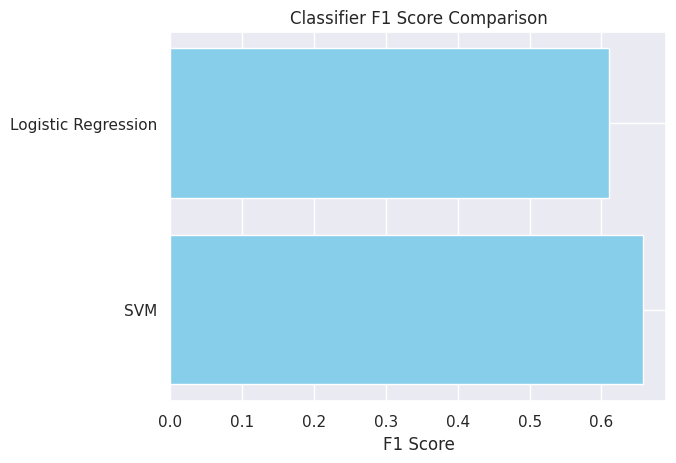

In [82]:
f1_scores = [svm_f1, log_reg_f1]
recall_scores = [svm_recall, log_reg_recall]
labels = ['SVM', 'Logistic Regression']

plt.barh(labels, f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('Classifier F1 Score Comparison')
plt.show()

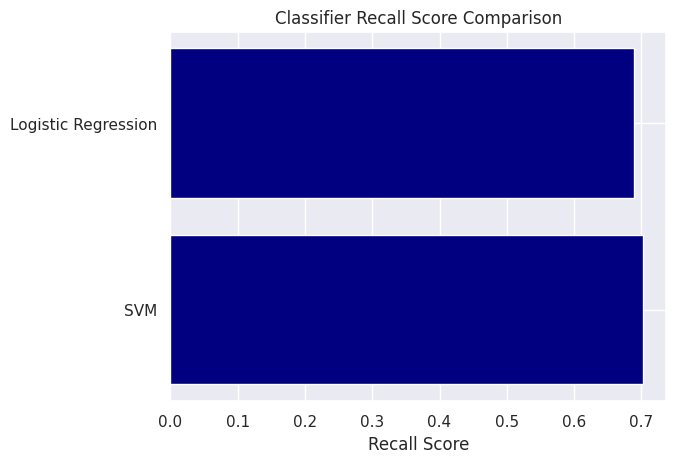

In [83]:
plt.barh(labels, recall_scores, color='navy')
plt.xlabel('Recall Score')
plt.title('Classifier Recall Score Comparison')
plt.show()

# **Hyperparameter Tuning**


---




In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
#grid for hyperparameter tuning options
hyperparameters_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'degree': [2, 3, 4]
}

hyperparameters_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    #'class_weight': ['balanced', {'class_label': weight}],
    'max_iter': [100, 200, 500, 1000, 2000],
    'multi_class': ['ovr', 'multinomial', 'auto']

}

In [86]:
n_iterations = 50

In [87]:
svm_cv = RandomizedSearchCV(svm_model, hyperparameters_svm,n_iter=n_iterations, cv=5, scoring='f1_macro', random_state= 42)
svm_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=SVC(class_weight='balanced', gamma='auto',
                                 kernel='linear', probability=True),
                   n_iter=50,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto', 0.01, 0.1,
                                                  1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42, scoring='f1_macro')

In [88]:
print("Tuned SVM Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

Tuned SVM Parameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': 2, 'C': 100}
Best score is 0.7060267370210067


In [89]:
log_reg_cv = RandomizedSearchCV(log_reg_model, hyperparameters_log_reg,n_iter=n_iterations, cv=5, scoring = 'f1_macro',random_state=42)
log_reg_cv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


110 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=1000),
                   n_iter=50,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 500, 1000, 2000],
                                        'multi_class': ['ovr', 'multinomial',
                                                        'auto'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='f1_macro')

In [90]:
print("Tuned Logistic Regression Parameters: {}".format(log_reg_cv.best_params_))
print("Best score is {}".format(log_reg_cv.best_score_))

Tuned Logistic Regression Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'auto', 'max_iter': 2000, 'C': 10}
Best score is 0.6441800514811986


In [91]:
best_params_svm = svm_cv.best_params_
best_params_log_reg = log_reg_cv.best_params_

Nonlinear SVM Accuracy Score =  77.08333333333334
Nonlinear SVM F1 Score = 75.07380225173983
Nonlinear SVM Recall = 72.7091132439598
              precision    recall  f1-score   support

          -1       0.69      0.85      0.76        34
           0       0.81      0.88      0.85        25
           1       0.85      0.74      0.79        23
           2       0.89      0.80      0.84        10
           3       0.60      0.69      0.64        13
           4       0.80      0.80      0.80         5
           5       1.00      0.57      0.73         7
           6       0.88      0.88      0.88         8
           7       0.75      0.60      0.67         5
           8       0.83      0.71      0.77         7
           9       0.50      0.20      0.29         5
          10       1.00      1.00      1.00         2

    accuracy                           0.77       144
   macro avg       0.80      0.73      0.75       144
weighted avg       0.78      0.77      0.77       144



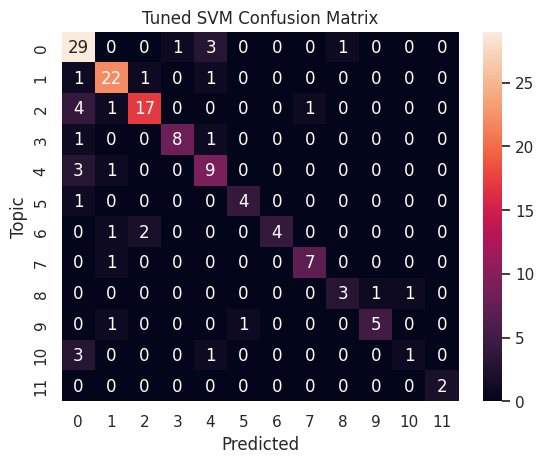

In [92]:
#tuned_svm_model = SVC(C=100, kernel='poly', degree=2, gamma='scale', class_weight = 'balanced', probability=True)
tuned_svm_model = SVC(**best_params_svm, class_weight = 'balanced', probability=True)
tuned_svm_model.fit(X_train,y_train)

tuned_predictions_svm = tuned_svm_model.predict(X_test)
tuned_svm_f1 = f1_score(y_test, tuned_predictions_svm, average='macro')
tuned_svm_recall = recall_score(y_test, tuned_predictions_svm, average='macro')
print("Nonlinear SVM Accuracy Score = ",accuracy_score(tuned_predictions_svm, y_test)*100)
print(f"Nonlinear SVM F1 Score = {tuned_svm_f1 * 100}")
print(f"Nonlinear SVM Recall = {tuned_svm_recall * 100}")
print(classification_report(y_test, tuned_predictions_svm))

cm_tuned_svm = confusion_matrix(y_test, tuned_predictions_svm)
sns.heatmap(cm_tuned_svm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Topic')
plt.title('Tuned SVM Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

          -1       0.73      0.47      0.57        34
           0       0.63      0.76      0.69        25
           1       0.69      0.78      0.73        23
           2       0.58      0.70      0.64        10
           3       0.50      0.54      0.52        13
           4       0.67      0.80      0.73         5
           5       1.00      0.43      0.60         7
           6       0.71      0.62      0.67         8
           7       0.75      0.60      0.67         5
           8       0.56      0.71      0.63         7
           9       0.50      0.80      0.62         5
          10       0.67      1.00      0.80         2

    accuracy                           0.65       144
   macro avg       0.67      0.68      0.65       144
weighted avg       0.67      0.65      0.64       144



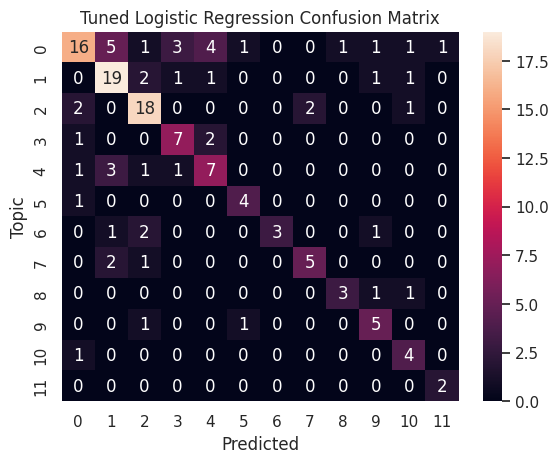

In [93]:
tuned_log_reg_model = LogisticRegression(**best_params_log_reg, class_weight='balanced')
tuned_log_reg_model.fit(X_train, y_train)
tuned_predictions_log_reg = tuned_log_reg_model.predict(X_test)
tuned_log_reg_f1 = f1_score(y_test, tuned_predictions_log_reg, average='macro')
tuned_log_reg_recall = recall_score(y_test, tuned_predictions_log_reg, average='macro')

print(classification_report(y_test, tuned_predictions_log_reg))

cm_tuned_logreg = confusion_matrix(y_test, tuned_predictions_log_reg)
sns.heatmap(cm_tuned_logreg, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.title('Tuned Logistic Regression Confusion Matrix')
plt.ylabel('Topic')
plt.show()

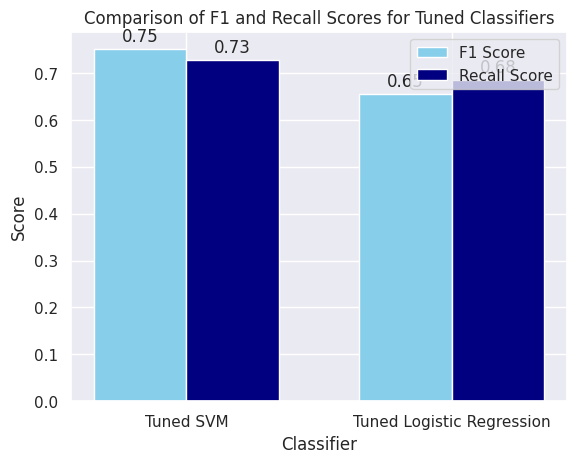

In [94]:
tuned_f1_scores = [tuned_svm_f1, tuned_log_reg_f1]
tuned_recall_scores = [tuned_svm_recall, tuned_log_reg_recall]
labels = ['Tuned SVM', 'Tuned Logistic Regression']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
f1_bars = ax.bar(x - width/2, tuned_f1_scores, width, label='F1 Score', color='skyblue')
recall_bars = ax.bar(x + width/2, tuned_recall_scores, width, label='Recall Score', color='navy')

ax.set_xlabel('Classifier')
ax.set_ylabel('Score')
ax.set_title('Comparison of F1 and Recall Scores for Tuned Classifiers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(f1_bars)
autolabel(recall_bars)
plt.show()




# plt.barh(labels, tuned_f1_scores, color='skyblue')
# plt.xlabel('Tuned F1 Score')
# plt.title('Tuned Classifier F1 Score Comparison')
# plt.show()

# plt.barh(labels, tuned_recall_scores, color='navy')
# plt.xlabel('Tuned Recall Score')
# plt.title('Tuned Classifier Recall Score Comparison')
# plt.show()